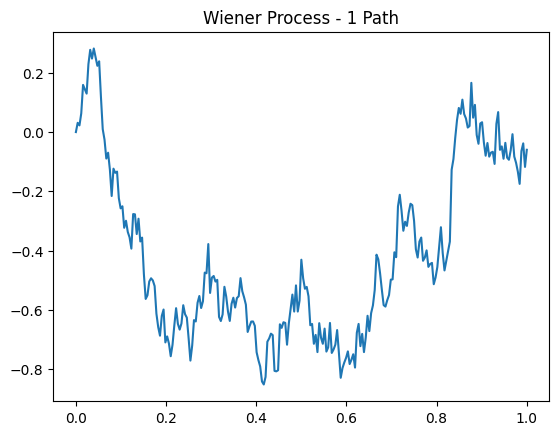

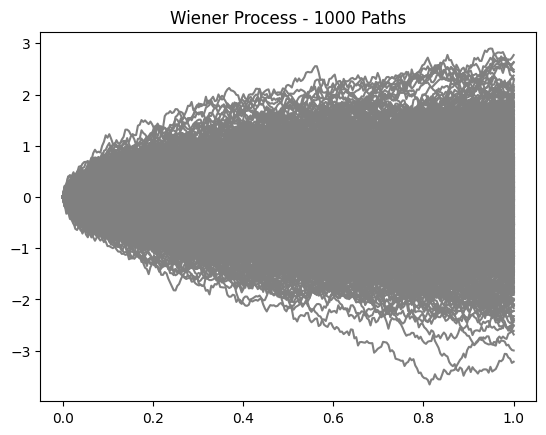

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulacion de proceso de Wiener
# 1 path
np.random.seed(42)  # Setting seed for reproducibility

n = 252
T = 1
dt = T / n
tiempo = np.arange(0, T + dt, dt)

dz = np.random.normal(size=n) * np.sqrt(dt)
z = np.cumsum(dz)
z = np.concatenate(([0], z))

plt.plot(tiempo, z)
plt.title('Wiener Process - 1 Path')
plt.show()

# Simulaciones de proceso de Wiener
# R paths
np.random.seed(42)  # Setting seed for reproducibility

R = 1000
n = 252
T = 1
dt = T / n
tiempo = np.arange(0, T + dt, dt)

dz = np.random.normal(size=(R, n)) * np.sqrt(dt)
z = np.cumsum(dz, axis=1)
z = np.column_stack([np.zeros(R), z])

plt.plot(tiempo, z.T, color='gray')
plt.title('Wiener Process - {} Paths'.format(R))
plt.show()


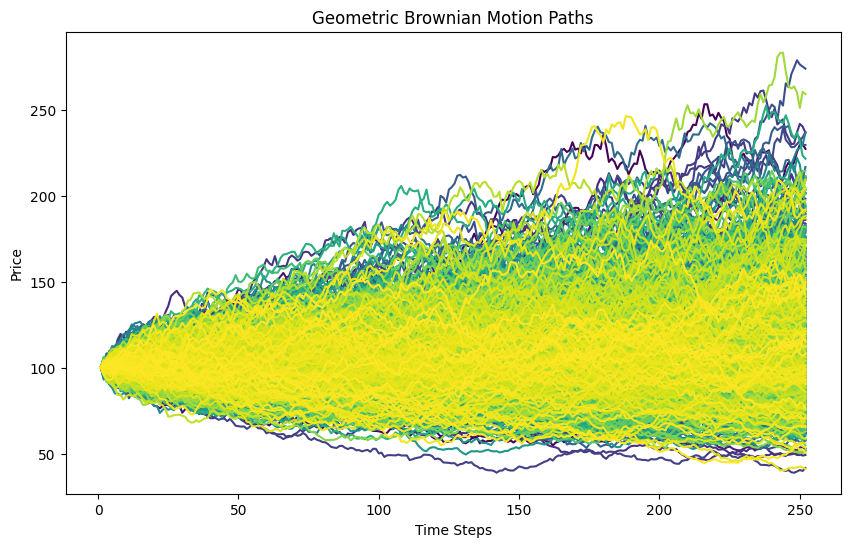

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulacion de trayectorias del movimiento browniano geometrico (GBM)
# paths
np.random.seed(42)  # Setting seed for reproducibility

R = 1000
T = 1
n = 252
dt = T / n

S = 100
mu = 0.15
sigma = 0.30

GBM = np.zeros((n, R))

for r in range(R):
    GBM[0, r] = S
    for day in range(1, n):
        epsilon = np.random.normal()
        GBM[day, r] = GBM[day - 1, r] + mu * GBM[day - 1, r] * dt + sigma * GBM[day - 1, r] * epsilon * np.sqrt(dt)

# Convert to DataFrame for visualization
gbm_df = pd.DataFrame(GBM, columns=[f'sim_{i+1}' for i in range(R)])
gbm_df['ix'] = np.arange(1, n + 1)

# Melt the DataFrame for better plotting
melted_gbm_df = gbm_df.melt(id_vars='ix', var_name='sim', value_name='price')

# Plot the GBM paths
plt.figure(figsize=(10, 6))
sns.lineplot(x='ix', y='price', hue='sim', data=melted_gbm_df, palette='viridis')
plt.title('Geometric Brownian Motion Paths')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend().set_visible(False)
plt.show()


## Código 2

[*********************100%%**********************]  1 of 1 completed
0.280678789071023
0.31470764435551557


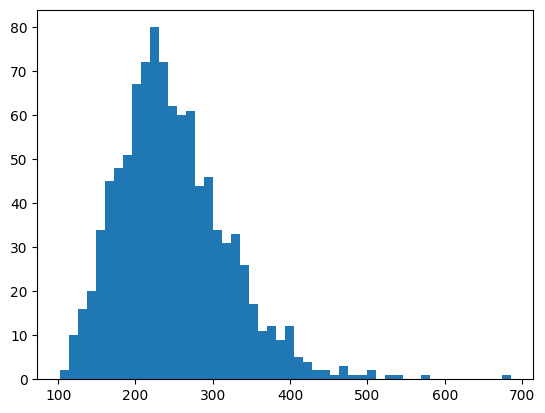

[149.13052536 239.05644772 378.58724713]


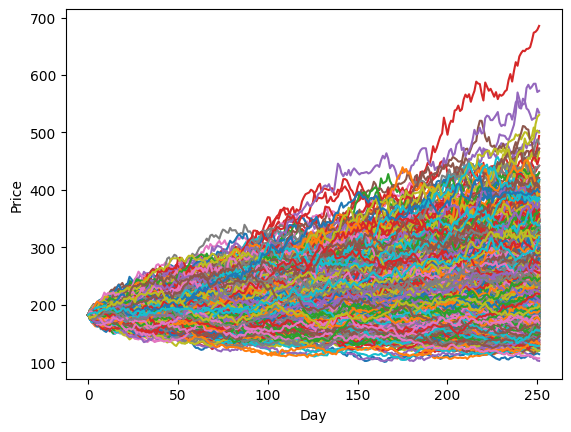

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Alpha & Sigma
aapl = yf.download("AAPL", start="2010-01-01", end="2022-01-01")
rets = np.log(aapl['Adj Close'] / aapl['Adj Close'].shift(1)).dropna()
sigma = np.std(rets) * np.sqrt(252)
print(sigma)
alpha = np.mean(rets) * 252 + 1/2 * sigma**2
print(alpha)

# Simulation of Geometric Brownian Motion (GBM) paths
S = yf.Ticker("AAPL").history(period="1d").tail(1)['Close'].iloc[0]
R = 1000
T = 1
n = 252
dt = T / n

GBM = np.zeros((n, R))

for r in range(R):
    GBM[0, r] = S
    for day in range(1, n):
        epsilon = np.random.normal()
        GBM[day, r] = GBM[day - 1, r] * np.exp((alpha - 1/2 * sigma**2) * dt + sigma * epsilon * np.sqrt(dt))

# Plot the histogram of GBM at day 252
plt.hist(GBM[-1, :], bins=50)
plt.show()

# Calculate quantiles
quantiles = np.percentile(GBM[-1, :], [5, 50, 95])
print(quantiles)

# Convert the GBM matrix to a DataFrame and reshape it
gbm_df = pd.DataFrame(GBM).reset_index()
gbm_df = gbm_df.melt(id_vars=['index'], var_name='sim', value_name='price')

# Plot the GBM paths
plt.figure()
for sim in gbm_df['sim'].unique():
    sim_data = gbm_df[gbm_df['sim'] == sim]
    plt.plot(sim_data['index'], sim_data['price'])

plt.xlabel('Day')
plt.ylabel('Price')
plt.show()